<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.286423  42.614035  79.316648  ...  173.200305  173.216592 -0.016287
      1.0    91.648109  28.373156  82.812707  ...  212.841791  212.834025  0.007766
      2.0    93.104187  99.366715  26.504452  ...  228.972741  228.976848 -0.004107
      3.0    99.084799  69.130559  76.191504  ...  254.402778  254.407363 -0.004585
      4.0    23.812794  91.011586  28.670841  ...  153.498088  153.495657  0.002431
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  34.149234  78.344687  40.918650  ...  163.419356  163.413025  0.006332
      246.0  76.846310  91.504788  43.974371  ...  222.321135  222.328069 -0.006934
      247.0  28.432775  78.071553  55.665628  ...  172.174858  172.169765  0.005092
      248.0  28.727841  74.580190  50.751198  ...  164.057880  164.058991 -0.001110
      249.0  56.680588  76.359389  99.257826  ...  242.302016  242.297218  0.004798

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.286423  42.614035  79.316648  ...  173.200305  173.216592 -0.016287
      1.0    91.648109  28.373156  82.812707  ...  212.841791  212.834025  0.007766
      2.0    93.104187  99.366715  26.504452  ...  228.972741  228.976848 -0.004107
      3.0    99.084799  69.130559  76.191504  ...  254.402778  254.407363 -0.004585
      4.0    23.812794  91.011586  28.670841  ...  153.498088  153.495657  0.002431
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  34.149234  78.344687  40.918650  ...  163.419356  163.413025  0.006332
      246.0  76.846310  91.504788  43.974371  ...  222.321135  222.328069 -0.006934
      247.0  28.432775  78.071553  55.665628  ...  172.174858  172.169765  0.005092
      248.0  28.727841  74.580190  50.751198  ...  164.057880  164.058991 -0.001110
      249.0  56.680588  76.359389  99.257826  ...  242.302016  242.297218  0.004798

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.286423  42.614035  79.316648  ...  173.200305  173.216592 -0.016287
      1.0    91.648109  28.373156  82.812707  ...  212.841791  212.834025  0.007766
      2.0    93.104187  99.366715  26.504452  ...  228.972741  228.976848 -0.004107
      3.0    99.084799  69.130559  76.191504  ...  254.402778  254.407363 -0.004585
      4.0    23.812794  91.011586  28.670841  ...  153.498088  153.495657  0.002431
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  34.149234  78.344687  40.918650  ...  163.419356  163.413025  0.006332
      246.0  76.846310  91.504788  43.974371  ...  222.321135  222.328069 -0.006934
      247.0  28.432775  78.071553  55.665628  ...  172.174858  172.169765  0.005092
      248.0  28.727841  74.580190  50.751198  ...  164.057880  164.058991 -0.001110
      249.0  56.680588  76.359389  99.257826  ...  242.302016  242.297218  0.004798

[250000 rows x 7 columns]

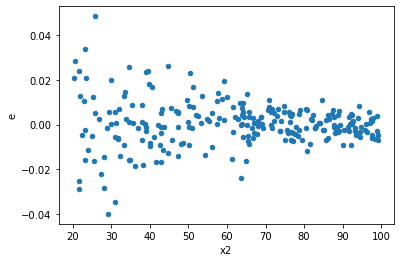

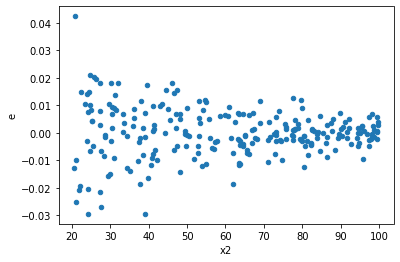

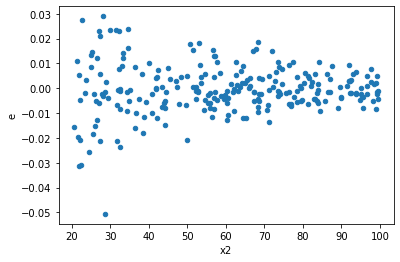

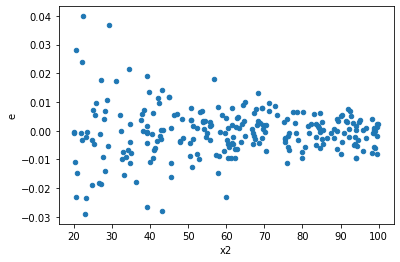

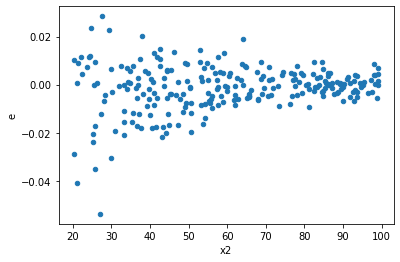

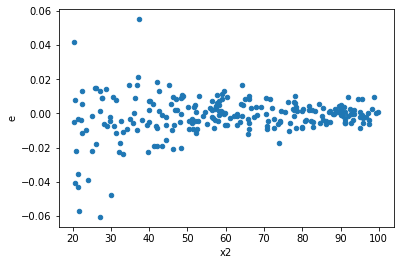

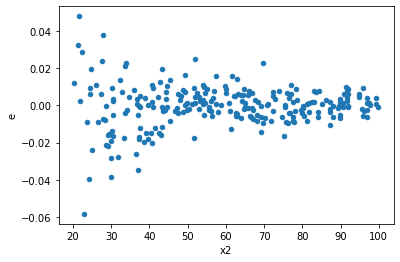

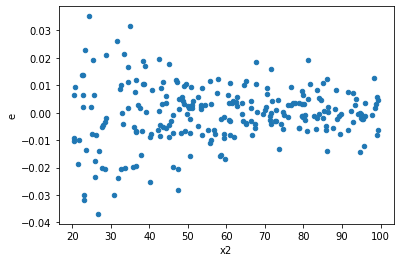

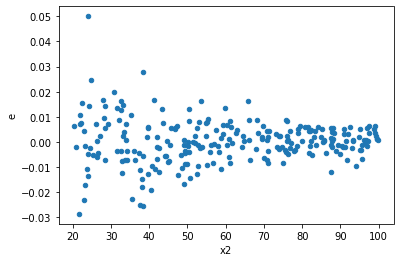

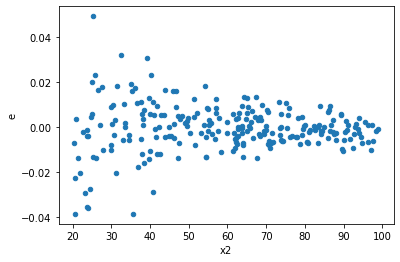

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.019350829092119767,0.00219540778729511,0.00019949308342391512,2.2633069972114537e-05,0.11345290565297511,6.842340564851482e-23,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.020581832055540244,0.002075706722684047,0.00021218383562412622,2.139903837818605e-05,0.10085140706049564,6.6676097418903465e-25,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.02130259675869471,0.0022481856474996778,0.00021961439957417228,2.3177171623708018e-05,0.10553575570931627,4.0307870866148905e-24,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.02151707085063802,0.002256099213251626,0.0002218254726869899,2.325875477578996e-05,0.10485159568941646,3.118120819256386e-24,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.017997063804286735,0.0022434671870913293,0.00018553674025037872,2.3128527701972468e-05,0.12465740031198623,2.551165978715222e-21,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.021267670456935752,0.0024544972061755835,0.00021925433460758507,2.5304094909026632e-05,0.11540978176926424,1.3277335342729072e-22,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.02327892857445833,0.0026159398450941265,0.00023998895437585906,2.6968452011279653e-05,0.11237372187156153,4.718650291132664e-23,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.020129737837407048,0.002217742462552577,0.00020752307048873246,2.2863324356212134e-05,0.11017244638086399,2.181158406198588e-23,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.022181692578488506,0.0022385217066748825,0.0002286772430772011,2.3077543367782293e-05,0.10091753362616562,6.843880075380331e-25,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64